# Experimental Overview
This jupyter notebook shows the code to generate the plots as used in

**Samantha Guerriero and Barbara Caputo and Thomas Mensink**,  
*DeepNCM: Deep Nearest Class Mean Classifiers*   
ICLR-Workshop 2018

In [1]:
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np

import matplotlib.pyplot as plt

import re
from collections import defaultdict
import glob

plt.rcParams['figure.figsize'] = [10, 5]
_EPOCH = 250

/home/tmensink/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Get current results

In [4]:
def get_list(d,e):
    expdir = '/tmp/deepncm/%s_resnet/' %(d)            
    explist = glob.glob('%s/*/%sevents.out.tfevents.*.*' %(expdir,e))
    explist.sort()
    return explist
    
def get_results(d='cifar10',e="eval/"):
    explist = get_list(d,e)    
    rdict = dict()

    for expfile in explist:
        es = expfile.split('/')
        name = es[4]
        fname = es[-1]
        n = name.split('_')[0]
        if n == 'softmax' or n == 'onlinemean' or n == 'onlinemeaneq':
            lr = name.split('_')[1]
            p  = "%s0" %(n[0])
        else:
            p  = name.split('_')[1]
            lr = name.split('_')[2]

        if n == 'omreset':
            n = 'condensation'
            
        x = EventAccumulator(path=expfile)
        x.Reload()
        
        acc = np.asarray([(s.step, s.value) for s in x.Scalars('accuracy')])
        A   = np.zeros((_EPOCH,2))
        A[0:min(_EPOCH,acc.shape[0]),:] = acc[0:min(_EPOCH,acc.shape[0]),:]
        
        k = "mcmdistance"        
        if k in x.Tags()['scalars']:
            rmd = np.asarray([(s.step, s.value) for s in x.Scalars(k)])
            R   = np.zeros((_EPOCH,2))
            R[0:min(_EPOCH,rmd.shape[0]),:] = rmd[0:min(_EPOCH,rmd.shape[0]),:]


        else:
            rmd = np.zeros((1,1))
            R   = None
            
        print ("%8s | %15s | %5s | %7s | (%4d %1d) (%4d %1d) | %s" %(d,n,p,lr,acc.shape[0],acc.shape[1],rmd.shape[0],rmd.shape[1],name))
        rdict[name] = {'name':n,'par':p,'lr':float(lr[2:]),'acc':A,'rmd':R}

    return rdict

In [5]:
c10dict = get_results(d='cifar10')
c100dict = get_results(d='cifar100')

 cifar10 |       decaymean |   d50 | lr1e-01 | ( 250 2) (   1 1) | decaymean_d50_lr1e-01
 cifar10 |       decaymean |   d50 | lr1e-02 | ( 250 2) ( 250 2) | decaymean_d50_lr1e-02
 cifar10 |       decaymean |   d75 | lr1e-01 | ( 250 2) (   1 1) | decaymean_d75_lr1e-01
 cifar10 |       decaymean |   d75 | lr1e-02 | ( 250 2) ( 250 2) | decaymean_d75_lr1e-02
 cifar10 |       decaymean |   d90 | lr1e-01 | ( 250 2) ( 250 2) | decaymean_d90_lr1e-01
 cifar10 |       decaymean |   d90 | lr1e-02 | ( 250 2) (   1 1) | decaymean_d90_lr1e-02
 cifar10 |       decaymean |   d95 | lr1e-01 | ( 250 2) (   1 1) | decaymean_d95_lr1e-01
 cifar10 |       decaymean |   d95 | lr1e-02 | ( 250 2) (   1 1) | decaymean_d95_lr1e-02
 cifar10 |    condensation | r0100 | lr1e-01 | ( 250 2) (   1 1) | omreset_r0100_lr1e-01
 cifar10 |    condensation | r0100 | lr1e-02 | ( 250 2) (   1 1) | omreset_r0100_lr1e-02
 cifar10 |    condensation | r0195 | lr1e-01 | ( 250 2) (   1 1) | omreset_r0195_lr1e-01
 cifar10 |    condens

In [14]:
np.save('c10dict.npy', c10dict) 
np.save('c100dict.npy', c100dict) 

In [22]:
c10dict = np.load("c10dict.npy").item()
c100dict = np.load("c100dict.npy").item()

dict_keys(['decaymean_d50_lr1e-01', 'decaymean_d50_lr1e-02', 'decaymean_d75_lr1e-01', 'decaymean_d75_lr1e-02', 'decaymean_d90_lr1e-01', 'decaymean_d90_lr1e-02', 'decaymean_d95_lr1e-01', 'decaymean_d95_lr1e-02', 'omreset_r0100_lr1e-01', 'omreset_r0100_lr1e-02', 'omreset_r0195_lr1e-01', 'omreset_r0195_lr1e-02', 'omreset_r0390_lr1e-01', 'omreset_r0390_lr1e-02', 'omreset_r0781_lr1e-01', 'omreset_r0781_lr1e-02', 'onlinemean_lr1e-01', 'onlinemean_lr1e-02', 'softmax_lr1e-01', 'softmax_lr1e-02'])
dict_keys(['decaymean_d50_lr1e-01', 'decaymean_d75_lr1e-01', 'decaymean_d90_lr1e-01', 'decaymean_d95_lr1e-01', 'omreset_r0100_lr1e-01', 'omreset_r0195_lr1e-01', 'omreset_r0390_lr1e-01', 'omreset_r0781_lr1e-01', 'onlinemean_lr1e-01', 'onlinemean_lr1e-02', 'softmax_lr1e-01', 'softmax_lr1e-02'])


# Figures

In [23]:
def get_plot_keys(rdict,m,opp):
    if isinstance(m, str):
        s = [k for k in rdict.keys() if (m in k)]
        t = m
    elif len(m) == 1:
        s = [k for k in rdict.keys() if (m[0] in k)]
        t = m[0]
    elif len(m) == 2:
        t = "%s %s %s" %(m[0],opp,m[1])
        if opp == "&":
            s = [k for k in rdict.keys() if (m[0] in k and m[1] in k)]
        else:
            s = [k for k in rdict.keys() if (m[0] in k or m[1] in k)]
    else:
        t = ""
        if opp == "&":
            s = [k for k in rdict.keys() if all([i for i in m if i in k])]
        else:
            s = [k for k in rdict.keys() if any([i for i in m if i in k])]                        
    return s,t

def plot_results(X,Y,L,tStr):
    plt.plot(X,Y,linewidth=2.0)
    leg = plt.legend(L,markerfirst=False)
    plt.title(tStr)

def plot_results_rmd(rdict=None,m=["onlinemean"],opp="|",tStr=""):
    r,t = get_plot_keys(rdict,m,opp)
    s   = [i for i in r if not (type(rdict[i]['rmd']) == type(None))]
           
    Y = np.concatenate([rdict[i]['rmd'][:,1] for i in s]).reshape([len(s),-1]).transpose()
    X = rdict[s[0]]['rmd'][:,0]
    L = ["%3s-%s-%5.2e" %(rdict[i]['name'][0:3],rdict[i]['par'][1:],rdict[i]['lr']) for i in s]
    plot_results(X,Y,L,tStr+t)
    
def plot_results_acc(rdict=None,m=["onlinemean"],opp="|",tStr="",lDetails=True):
    s,t = get_plot_keys(rdict,m,opp)
            
    Y = np.concatenate([rdict[i]['acc'][:,1] for i in s]).reshape([-1,250]).transpose()
    X = np.arange(0,_EPOCH)    
    if lDetails:
        L = ["%3s-%s-%5.2e (%5.2f)" %(rdict[i]['name'][0:3],rdict[i]['par'][1:],rdict[i]['lr'], 100*rdict[i]['acc'][:,1].max()) for i in s]
    else:
        L = ["%s (%5.2f)" %(rdict[i]['name'], 100*rdict[i]['acc'][:,1].max()) for i in s]
    plot_results(X,Y,L,tStr+t)    

## Overview of all experiments (on C10/C100)

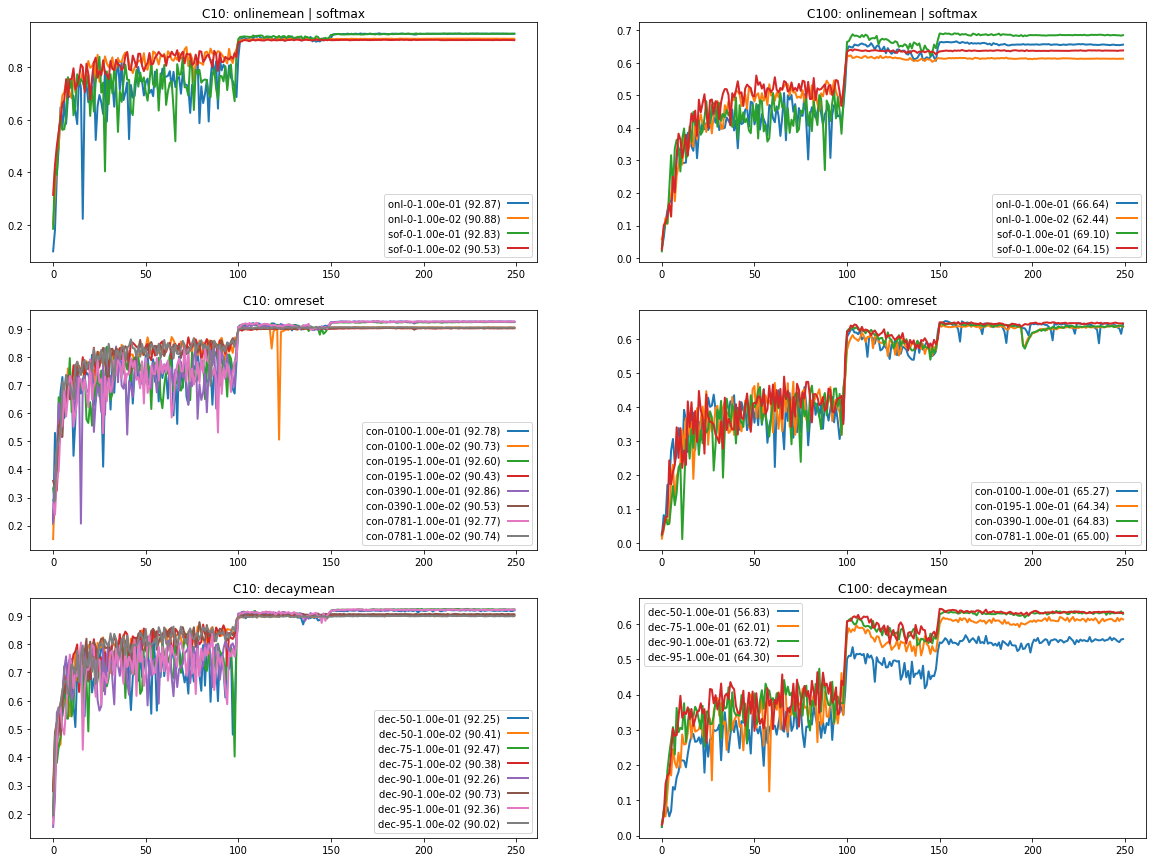

In [24]:
plt.figure(1,figsize=[20,15])
plt.subplot(321)
plot_results_acc(rdict=c10dict,m=["onlinemean","softmax"],opp="|",tStr="C10: ")
plt.subplot(323)
plot_results_acc(rdict=c10dict,m="omreset",tStr="C10: ")
plt.subplot(325)
plot_results_acc(rdict=c10dict,m="decaymean",tStr="C10: ")

plt.subplot(322)
plot_results_acc(rdict=c100dict,m=["onlinemean","softmax"],opp="|",tStr="C100: ")
plt.subplot(324)
plot_results_acc(rdict=c100dict,m="omreset",tStr="C100: ")
plt.subplot(326)
plot_results_acc(rdict=c100dict,m="decaymean",tStr="C100: ")
#plt.savefig("./exp_cifar_overview.pdf",dpi=150,bbox_inches="tight",pad_inches=0.1,transparent=False,facecolor='w')
#plt.savefig("./exp_cifar_overview.png",dpi=100,bbox_inches="tight",pad_inches=0.1,transparent=False,facecolor='w')
plt.show()

# Workshop/Poster Figure

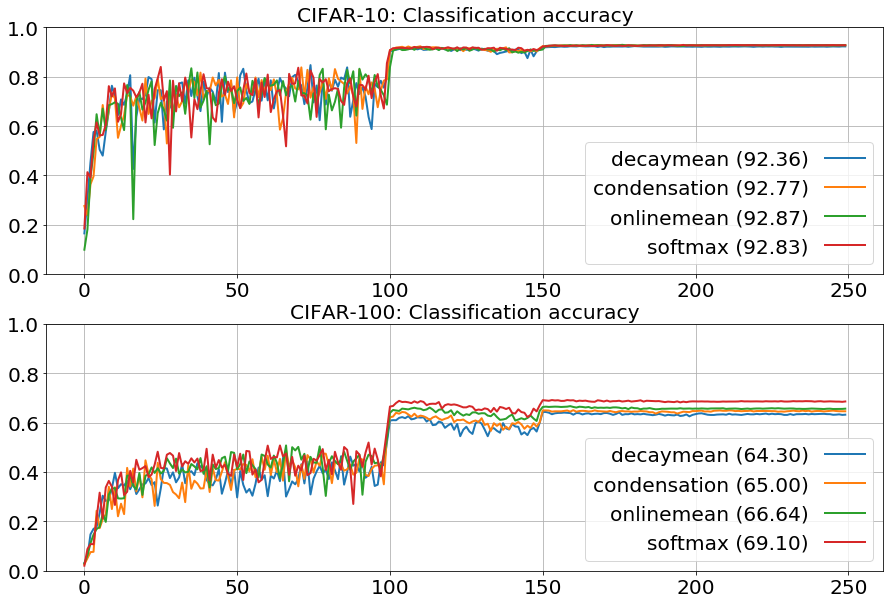

In [25]:
m = ["softmax_lr1e-01","onlinemean_lr1e-01","decaymean_d95_lr1e-01","omreset_r0781_lr1e-01"]
import matplotlib.pylab as pylab
params = {'font.size' : 14,
          'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.figure(1,figsize=[15,10])
plt.subplot(211)
plot_results_acc(rdict=c10dict,m=m,opp="|",tStr="CIFAR-10: Classification accuracy",lDetails=False)
plt.grid()
plt.ylim(0,1)
plt.subplot(212)
plot_results_acc(rdict=c100dict,m=m,opp="|",tStr="CIFAR-100: Classification accuracy",lDetails=False)
plt.grid()
plt.ylim(0,1)
#plt.savefig("./exp_cifar_best.pdf",dpi=250,bbox_inches="tight",pad_inches=0.1,transparent=False,facecolor='w')
plt.show()